 22.05.2017 al el 25.05.2017


In [1]:
import pandas as pd
import tools
from datetime import datetime
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import datetime as dt

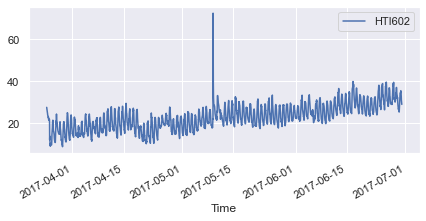

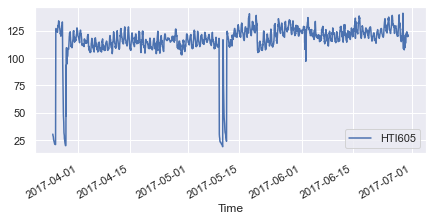

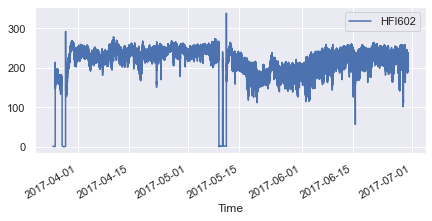

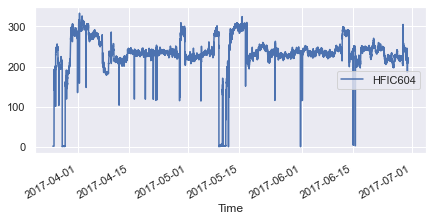

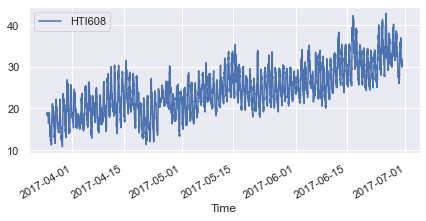

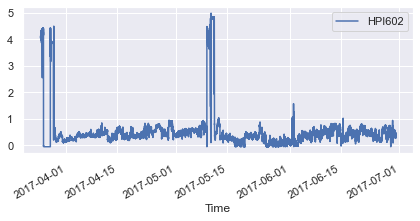

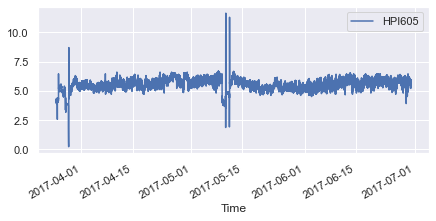

In [2]:
df_1 = pd.read_csv(r'..\data\untouched_data\compressor\2016\HTI602.csv', sep=';')
df_2 = pd.read_csv(r'..\data\untouched_data\compressor\2016\HTI605.csv', sep=';')
df_3 = pd.read_csv(r'..\data\untouched_data\compressor\2016\HFI602.csv', sep=';')
df_4 = pd.read_csv(r'..\data\untouched_data\compressor\2016\HFI604.csv', sep=';')
df_5 = pd.read_csv(r'..\data\untouched_data\compressor\2016\HTI608.csv', sep=';')
df_6 = pd.read_csv(r'..\data\untouched_data\compressor\2016\HPI602.csv', sep=';')
df_7 = pd.read_csv(r'..\data\untouched_data\compressor\2016\HPI605.csv', sep=';')
df_1['Time'] = pd.to_datetime(df_1['Time'], format=tools.date_format)
df_2['Time'] = pd.to_datetime(df_2['Time'], format=tools.date_format)
df_3['Time'] = pd.to_datetime(df_3['Time'], format=tools.date_format)
df_4['Time'] = pd.to_datetime(df_4['Time'], format=tools.date_format)
df_5['Time'] = pd.to_datetime(df_5['Time'], format=tools.date_format)
df_6['Time'] = pd.to_datetime(df_6['Time'], format=tools.date_format)
df_7['Time'] = pd.to_datetime(df_7['Time'], format=tools.date_format)
splits = ['25/03/2017','01/05/2017','30/06/2017']
d_1 = datetime.strptime(splits[0], "%d/%m/%Y")
d_2 = datetime.strptime(splits[2], "%d/%m/%Y")
df_1 = df_1.set_index('Time').sort_index()[d_1:d_2]
df_2 = df_2.set_index('Time').sort_index()[d_1:d_2]
df_3 = df_3.set_index('Time').sort_index()[d_1:d_2]
df_4 = df_4.set_index('Time').sort_index()[d_1:d_2]
df_5 = df_5.set_index('Time').sort_index()[d_1:d_2]
df_6 = df_6.set_index('Time').sort_index()[d_1:d_2]
df_7 = df_7.set_index('Time').sort_index()[d_1:d_2]
tools.plot_df(df_1)
tools.plot_df(df_2)
tools.plot_df(df_3)
tools.plot_df(df_4)
tools.plot_df(df_5)
tools.plot_df(df_6)
tools.plot_df(df_7)

Train starts at 2017-03-25 00:06:07 and ends at 2017-04-30 23:37:43
Test starts at 2017-05-01 00:30:09 and ends at 2017-06-29 23:59:57


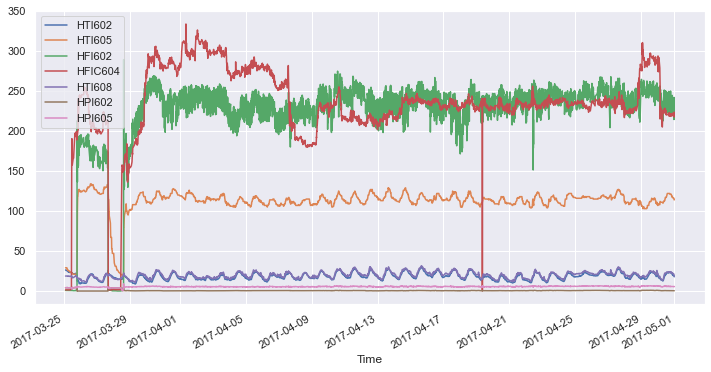

In [3]:
year = 2017 
df_list = [df_1, df_2, df_3, df_4, df_5, df_6, df_7]
dataset_train, dataset_test = tools.init_datasets_prepared(df_list, splits,resample=False, resample_time='5Min')
tools.plot_train(dataset_train)

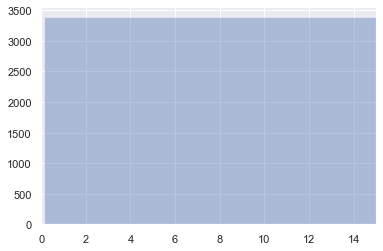

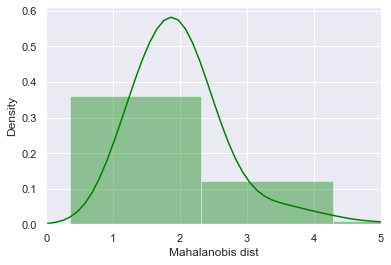

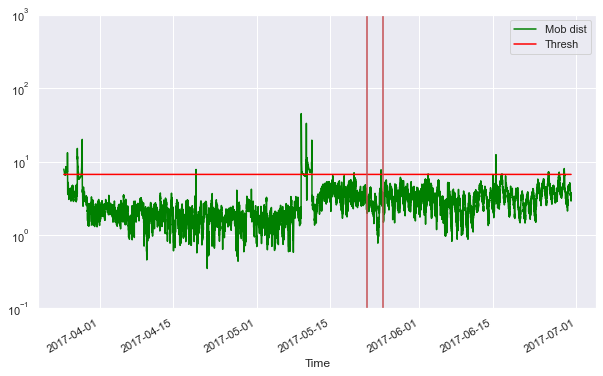

In [4]:
dist_test, dist_train, threshold, anomaly_alldata = tools.dists_and_anomalies(dataset_train.dropna(), dataset_test.dropna(), components=len(df_list))
tools.plot_M_distance_squared(dist_train, scale=15)
tools.plot_M_distance(dist_train)
tools.plot_anomaly_metric(anomaly_alldata)
plt.axvline(dt.datetime(2017, 5, 22), color='r')
plt.axvline(dt.datetime(2017, 5, 25), color='r')

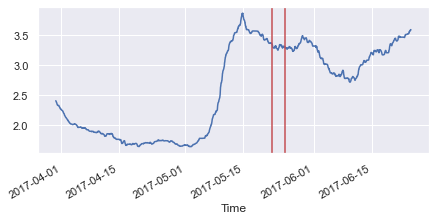

In [8]:
mob_dist = anomaly_alldata['Mob dist']
f,ax=plt.subplots(figsize=(7,3))
mob_dist.rolling(window=1000,center=True).median().plot(ax=ax)
plt.axvline(dt.datetime(2017, 5, 22), color='r')
plt.axvline(dt.datetime(2017, 5, 25), color='r')